Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv(r"C:\Users\prash\Downloads\Machine learning\29 May 2022 ML prize task\Algerian_forest_fires_dataset_UPDATE.csv")

In [92]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not Fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not Fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not Fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not Fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not Fire


In [4]:
df.shape

(122, 14)

In [5]:
df.size

1708

In [7]:
df.memory_usage()

Index          128
day            976
month          976
year           976
Temperature    976
 RH            976
 Ws            976
Rain           976
FFMC           976
DMC            976
DC             976
ISI            976
BUI            976
FWI            976
Classes        976
dtype: int64

In [8]:
## understanding the data types 
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [9]:
## Checking the null values 

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [10]:
## cheking the duplicate rows
df.duplicated().sum()

0

In [11]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [93]:
##rename the columns
df.rename(columns={' RH': 'RH',' Ws':'Ws','Rain ':'Rain'},inplace=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
def unique (data):
    data_unique=data.unique()
    data_unique.sort()
    return data_unique

In [15]:
unique(df["Temperature"])

array([22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37],
      dtype=int64)

In [16]:
### Relative Humidity value 
unique(df["RH"])

array([45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 84, 86, 88, 89], dtype=int64)

In [17]:
### wind speed value 
unique(df["Ws"])

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26], dtype=int64)

In [18]:
### Rain unique value 
unique(df["Rain"])

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.2,  1.3,  1.4,  1.8,  2.5,  3.1,  3.8,  4.6,  5.8,  7.2,  8.3,
       10.1, 13.1, 16.8])

In [19]:
unique(df["month"])

array([6, 7, 8, 9], dtype=int64)

In [20]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,5.358691e-17,NaN,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301,0.467585
month,5.358691e-17,1.000000e+00,NaN,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113,0.003330
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1.810918e-01,-3.570824e-02,NaN,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-2.106080e-01,-8.802546e-02,NaN,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,6.396952e-02,-7.803641e-03,NaN,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-9.748921e-02,1.451800e-01,NaN,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,2.917513e-01,-4.074604e-02,NaN,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,5.427601e-01,-7.624391e-03,NaN,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,5.686443e-01,-6.211283e-03,NaN,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911


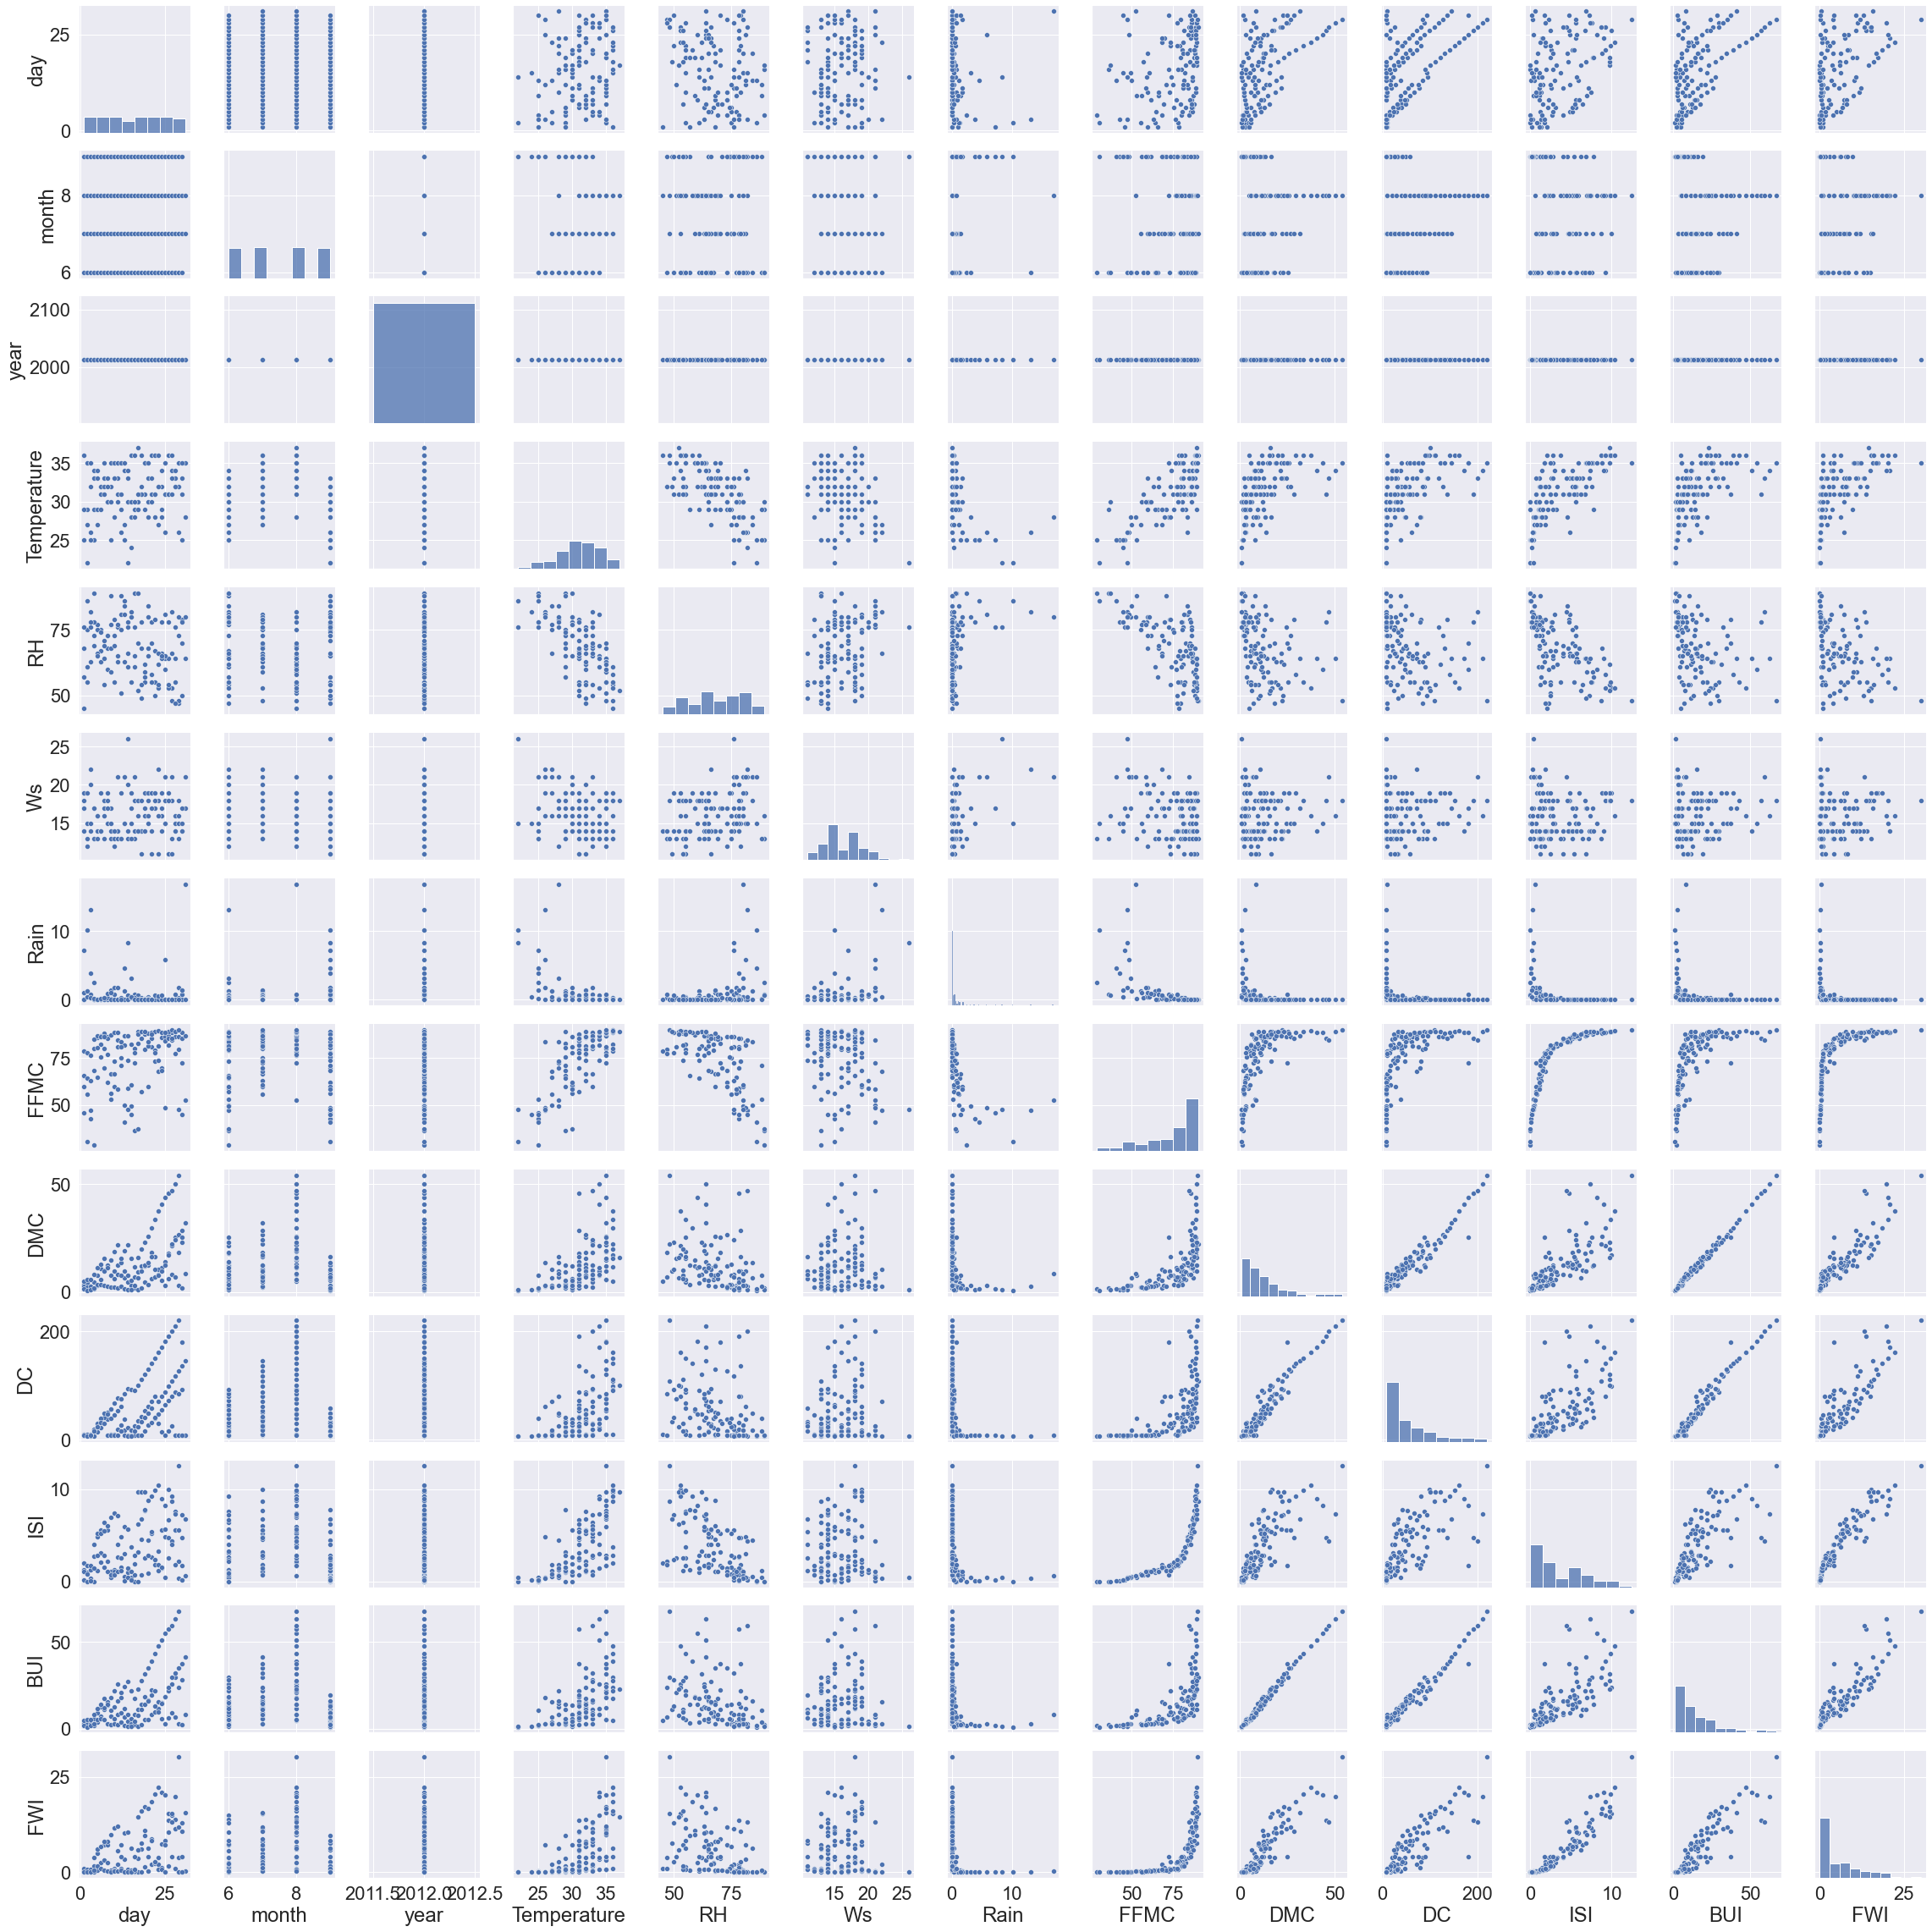

In [48]:
sns.pairplot(df)
sns.set(font_scale =5)

In [17]:
### filtering FIRE data 
fire=df.loc[df["Classes"]==1,:]
fire=fire.iloc[:,3:7]
fire.head(2)

,Temperature,RH,Ws,Rain


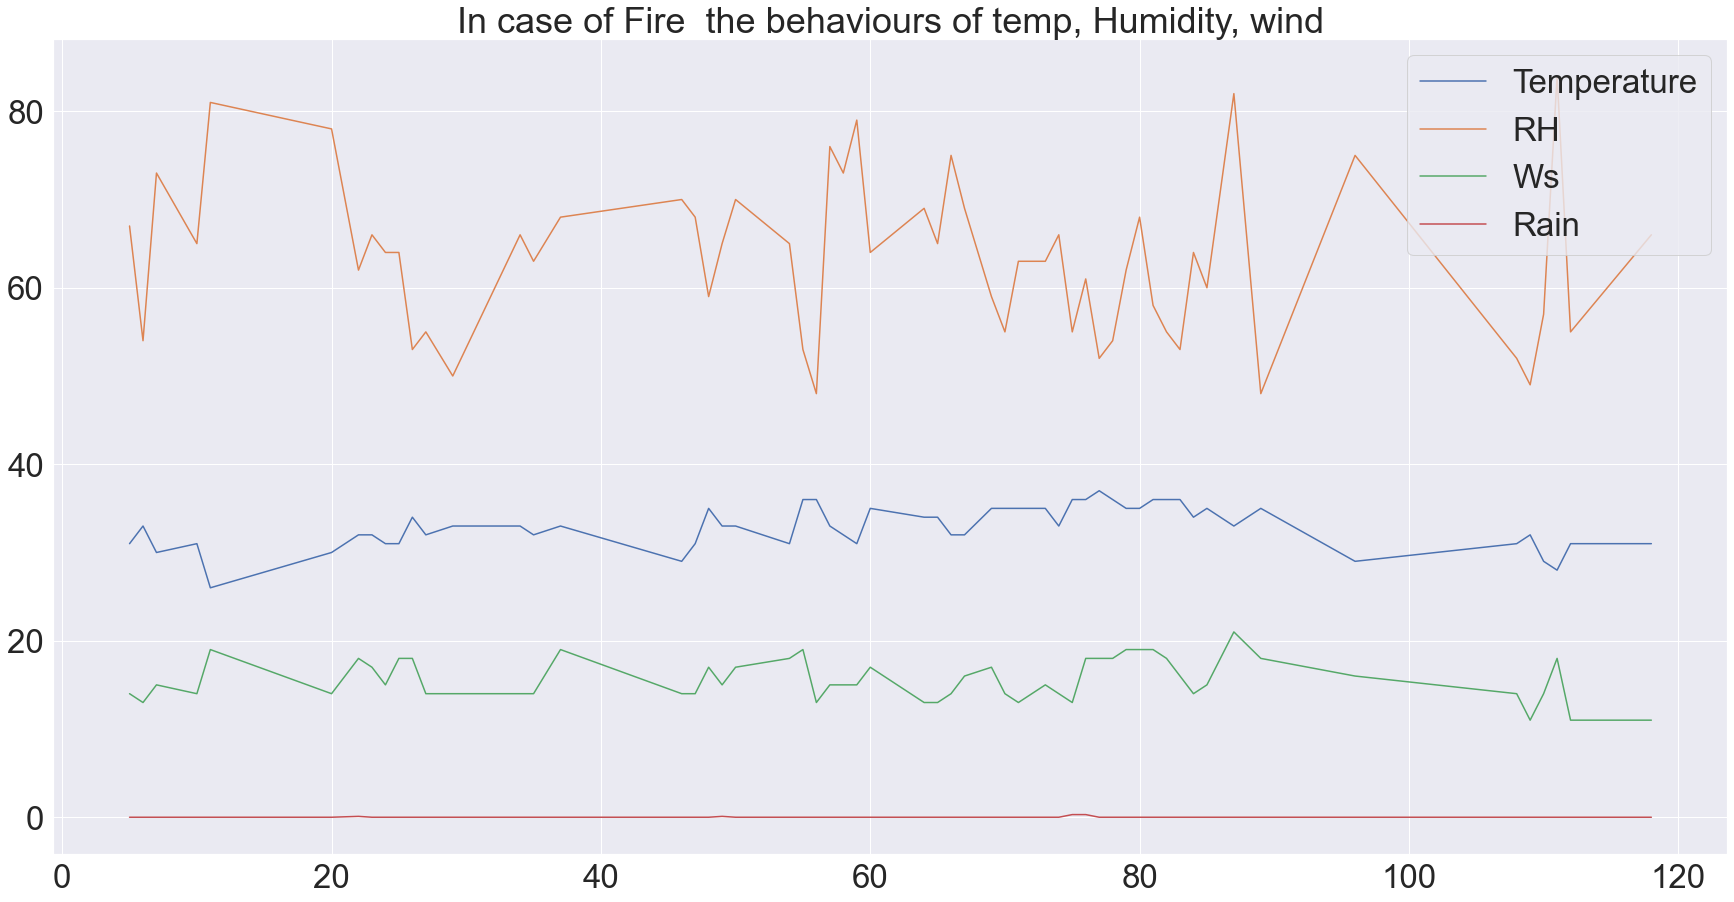

In [107]:
fire.plot(figsize=(30, 15),title="In case of Fire  the behaviours of temp, Humidity, wind")
sns.set(font_scale =3)


In [114]:
## Filtering No fire data
no_fire=df.loc[df["Classes"]==0,:]
no_fire=no_fire.iloc[:,3:7]
no_fire.head(2)

,Temperature,RH,Ws,Rain
0,29,57,18,0.0
1,29,61,13,1.3


<AxesSubplot:title={'center':'In case of No Fire  the behaviours of temp, Humidity, wind'}>

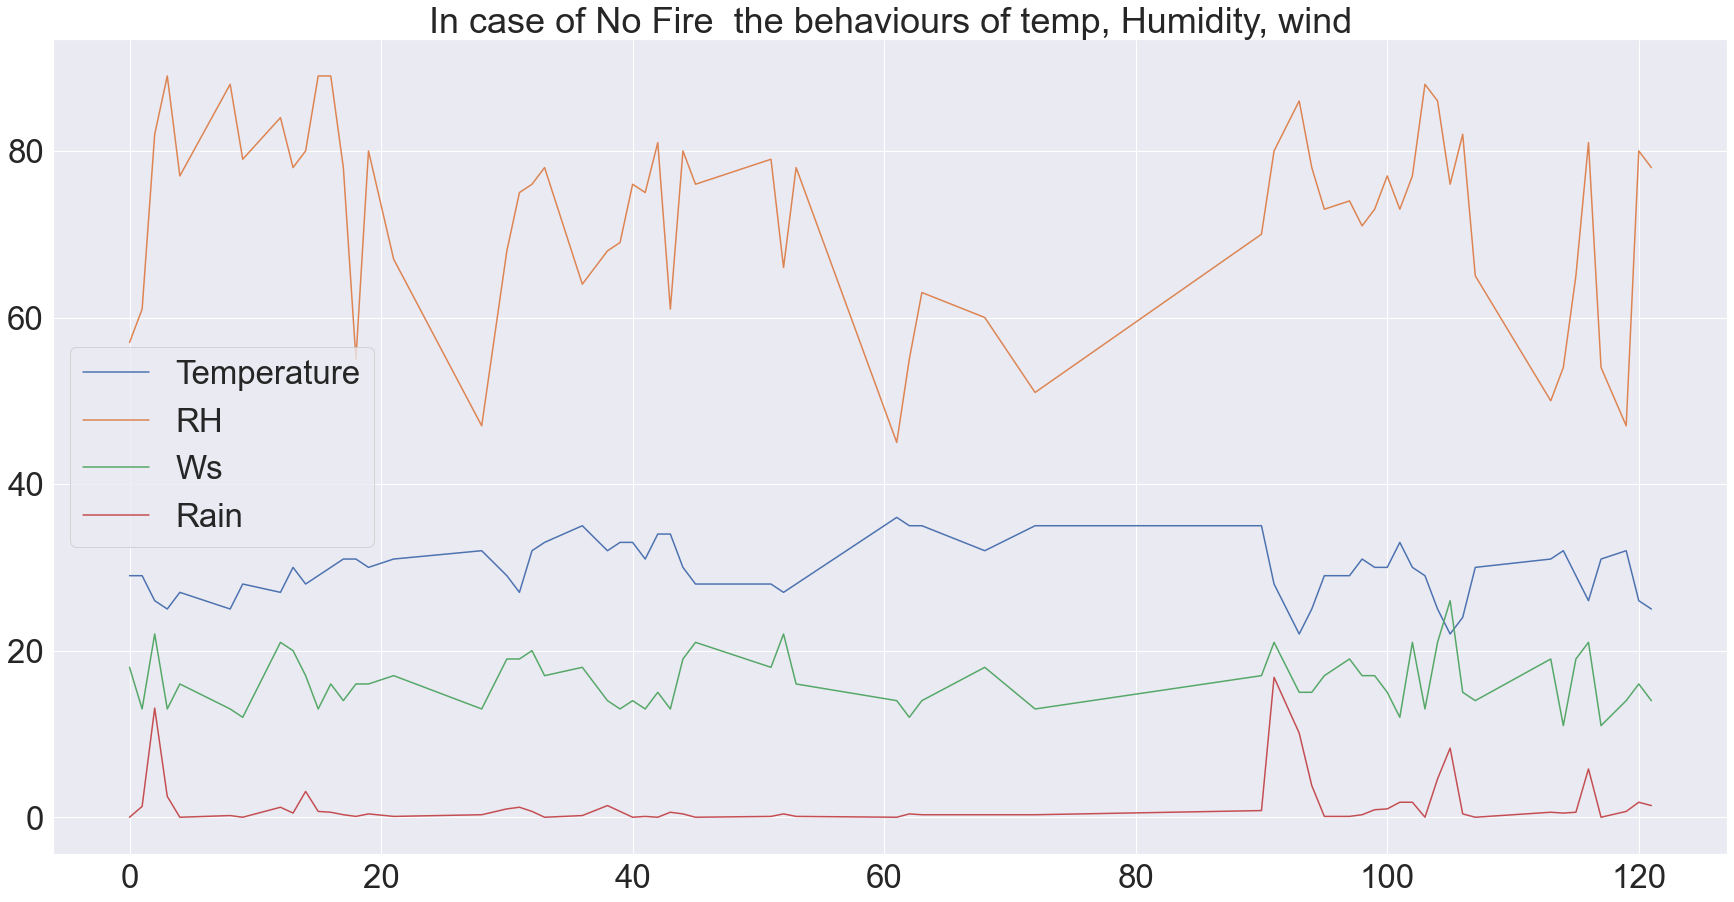

In [115]:
no_fire.plot(figsize=(30, 15),title="In case of No Fire  the behaviours of temp, Humidity, wind")

In [125]:
### filtering FIRE data TO PLOT LINE GRAPH WITH fwi parameters 
fire=df.loc[df["Classes"]==1,:]
fire=fire.iloc[:,7:]
fire.head(2)

,FFMC,DMC,DC,ISI,BUI,FWI,Classes
5,82.6,5.8,22.2,3.1,7.0,2.5,1.0
6,88.2,9.9,30.5,6.4,10.9,7.2,1.0


<AxesSubplot:title={'center':'In case of Fire  the behaviours of FWI'}>

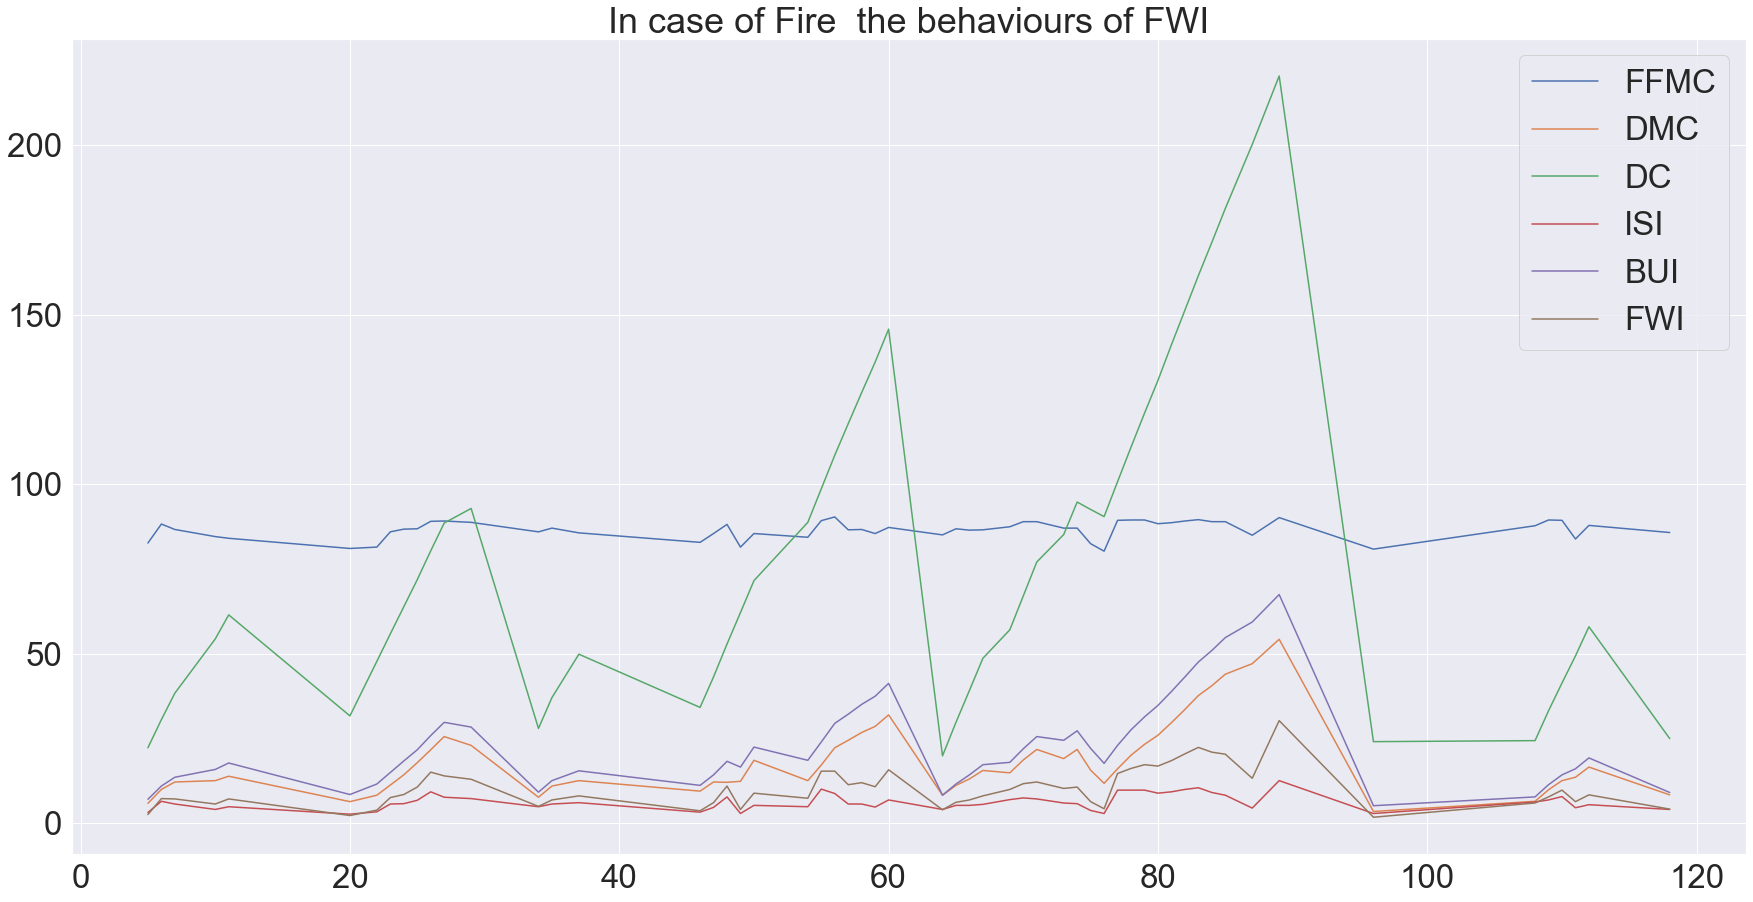

In [119]:
fire.plot(figsize=(30, 15),title="In case of Fire  the behaviours of FWI")

In [131]:
### filtering FIRE data TO PLOT LINE GRAPH WITH fwi parameters 
no_fire1=df.loc[df["Classes"]==0,:]
no_fire1=no_fire1.iloc[:,7:13]
no_fire1.head(2)

,FFMC,DMC,DC,ISI,BUI,FWI
0,65.7,3.4,7.6,1.3,3.4,0.5
1,64.4,4.1,7.6,1.0,3.9,0.4


<AxesSubplot:title={'center':'In case of Fire  the behaviours of FWI'}>

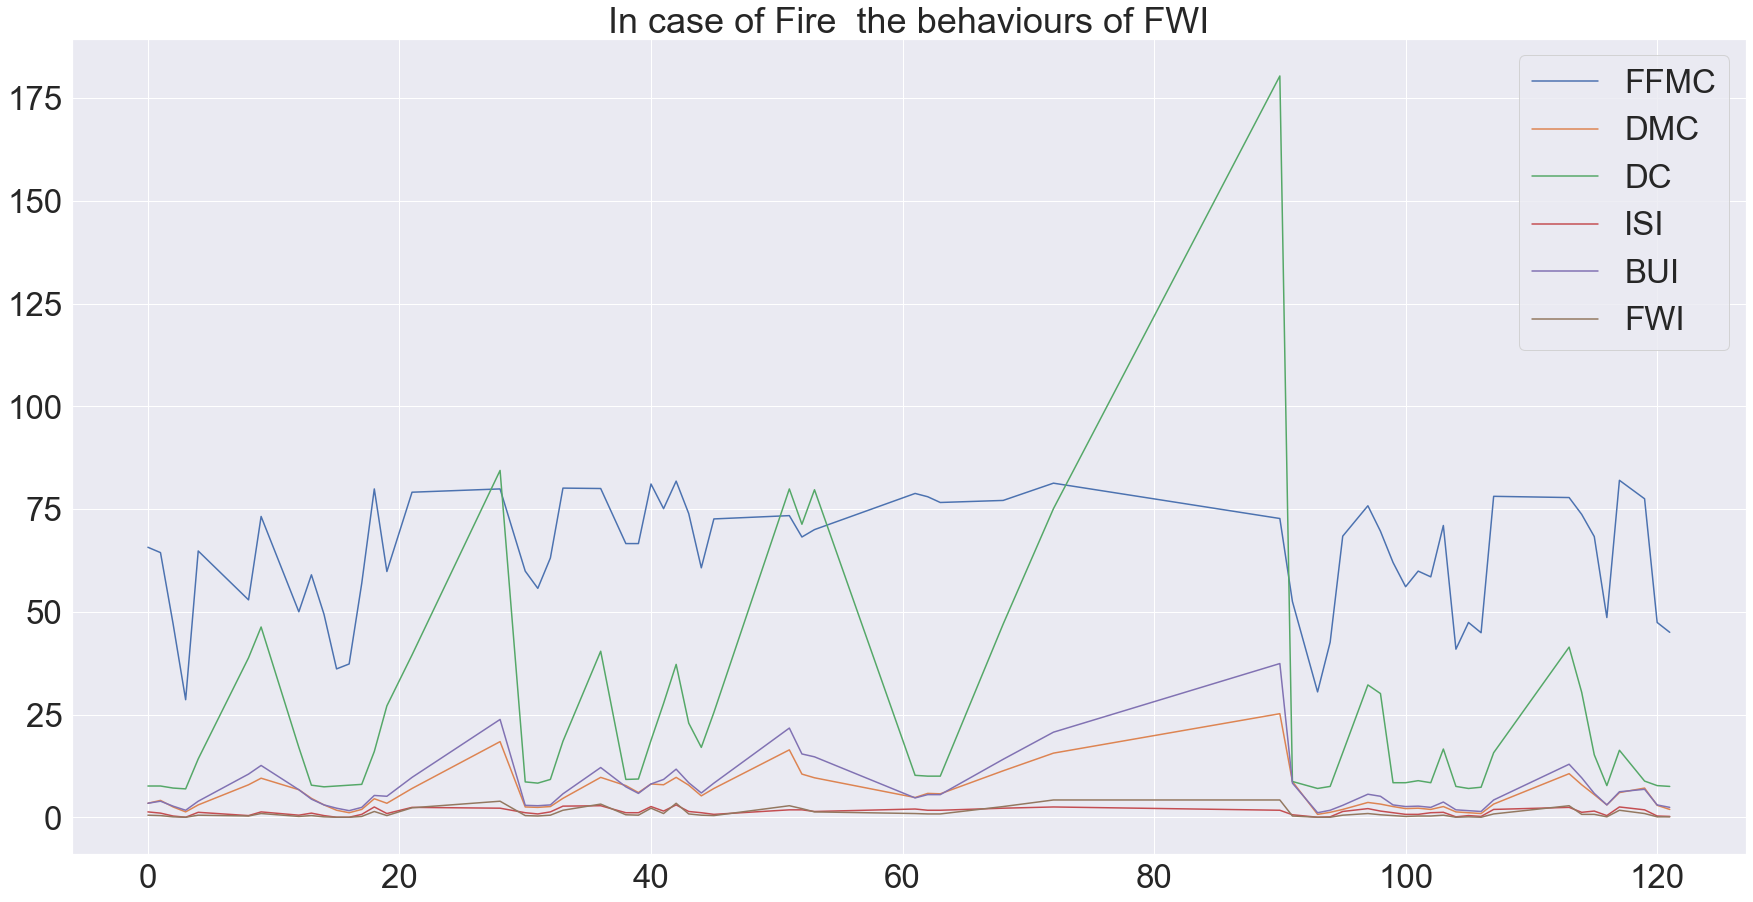

In [132]:
no_fire1.plot(figsize=(30, 15),title="In case of Fire  the behaviours of FWI")

Text(0.5, 1.0, 'Count of fire in month')

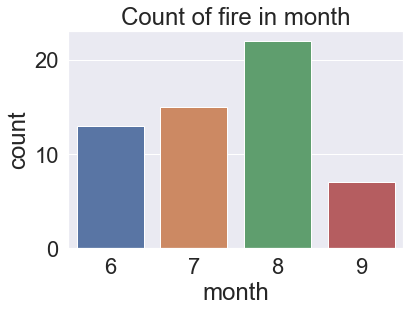

In [88]:
p=sns.countplot(x="month",data=df.loc[df["Classes"]==1])
p.set_title("Count of fire in month")

<AxesSubplot:xlabel='month', ylabel='Ws'>

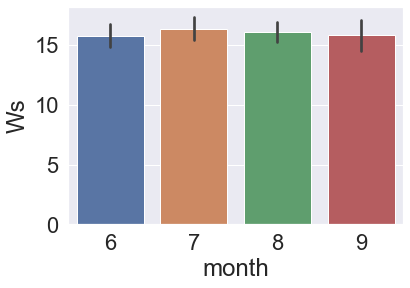

In [89]:
sns.barplot(x="month", y="Ws",data=df)

<AxesSubplot:xlabel='month', ylabel='Rain'>

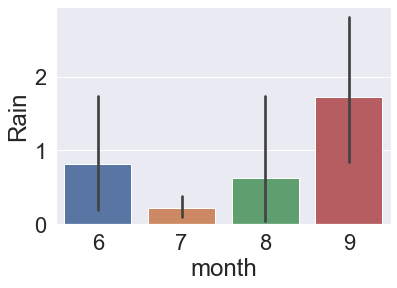

In [90]:
sns.barplot(x="month", y="Rain",data=df)

<AxesSubplot:xlabel='month', ylabel='RH'>

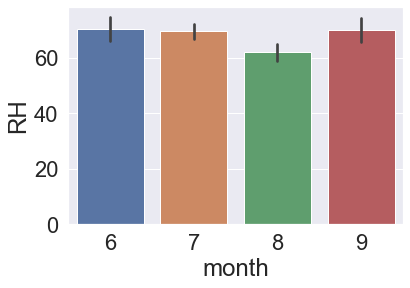

In [91]:
sns.barplot(x="month", y="RH",data=df)

In [23]:
### month fire percentage calculation 
total_fire=len(df.loc[df["Classes"]==1])
total_fire_in_month_six=len(df.loc[df["Classes"]==1].loc[df["month"]==6])
total_fire_in_month_six

13

In [24]:
sixth_month_percentage=round(total_fire_in_month_six*100/total_fire,3)
print("{}% fire happen in the  6th  of total fire".format(sixth_month_percentage))

22.807% fire happen in the  6th  of total fire


In [27]:
total_fire=len(df.loc[df["Classes"]==1])
total_fire_in_month_seven=len(df.loc[df["Classes"]==1].loc[df["month"]==7])
total_fire_in_month_seven
seven_month=round(total_fire_in_month_seven*100/total_fire,3)
print("{}% fire happen in the  7th  of total fire".format(seven_month))

26.316% fire happen in the  7th  of total fire


In [29]:
total_fire=len(df.loc[df["Classes"]==1])
total_fire_in_month_eight=len(df.loc[df["Classes"]==1].loc[df["month"]==8])

eight_month=round(total_fire_in_month_eight*100/total_fire,3)
print("{}% fire happen in the  8th  of total fire".format(eight_month))

38.596% fire happen in the  8th  of total fire


In [30]:
total_fire=len(df.loc[df["Classes"]==1])
total_fire_in_month_nine=len(df.loc[df["Classes"]==1].loc[df["month"]==9])
total_fire_in_month_eight
nine_month=round(total_fire_in_month_nine*100/total_fire,3)
print("{}% fire happen in the  9th  of total fire".format(nine_month))

12.281% fire happen in the  9th  of total fire


In [31]:
month=[6,7,8,9]
fire_percentage=[{"month 6":sixth_month_percentage,"month 7":seven_month,"month 8":eight_month,"month 9":nine_month}]
df1=pd.DataFrame(fire_percentage)
df1.index=["Fire in percentage"]
df1

,month 6,month 7,month 8,month 9
Fire in percentage,22.807,26.316,38.596,12.281


## 38.589 % of the fire happen in month of August 

(array([0]), [Text(0, 0, 'Fire in percentage')])

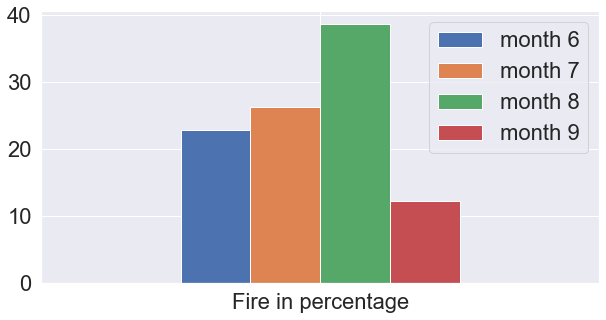

In [92]:
df1.plot(kind="bar",figsize=(10,5))
plt.xticks(rotation=0)

               month 6    month 7    month 8    month 9
RH           64.000000  65.800000  61.636364  62.571429
Temperature  31.230769  32.866667  34.772727  30.142857
Ws           15.615385  15.733333  16.136364  13.571429
Rain          0.007692   0.006667   0.027273   0.000000


C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\si

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RH'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Ws'),
  Text(3, 0, 'Rain')])

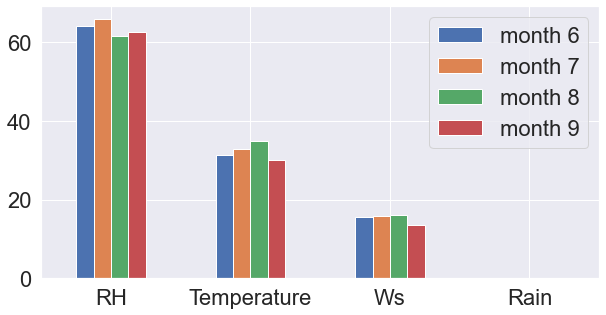

In [94]:
### Finding the mean of the Overcast with respect to each month.
fire=df.loc[df["Classes"]==1,["month","RH","Temperature","Ws","Rain"]]
mean_fire_6=np.mean(fire.loc[df["month"]==6,["RH","Temperature","Ws","Rain"]])
mean_fire_7=np.mean(fire.loc[df["month"]==7,["RH","Temperature","Ws","Rain"]])
mean_fire_8=np.mean(fire.loc[df["month"]==8,["RH","Temperature","Ws","Rain"]])
mean_fire_9=np.mean(fire.loc[df["month"]==9,["RH","Temperature","Ws","Rain"]])
l1={"month 6":mean_fire_6,"month 7":mean_fire_7,"month 8":mean_fire_8,"month 9":mean_fire_9}
l1
df2=pd.DataFrame(l1)
print(df2)
df2.plot(kind="bar",figsize=(10,5))
plt.xticks(rotation=0)

# The reason of the more Fire in Month 8 is average temperature is more , average ratio humidity is low

In [ ]:
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1

C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\prash\anaconda3\lib\si

             FFMC        DMC          DC       ISI        BUI        FWI
Month6  85.730769  13.984615   56.846154  5.523077  17.184615   7.984615
Month7  86.073333  17.240000   80.040000  5.740000  22.460000   9.366667
Month8  87.404545  24.650000  108.686364  7.313636  31.168182  13.640909
Month9  86.357143  10.057143   36.400000  5.357143  11.785714   6.242857


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Month6'),
  Text(1, 0, 'Month7'),
  Text(2, 0, 'Month8'),
  Text(3, 0, 'Month9')])

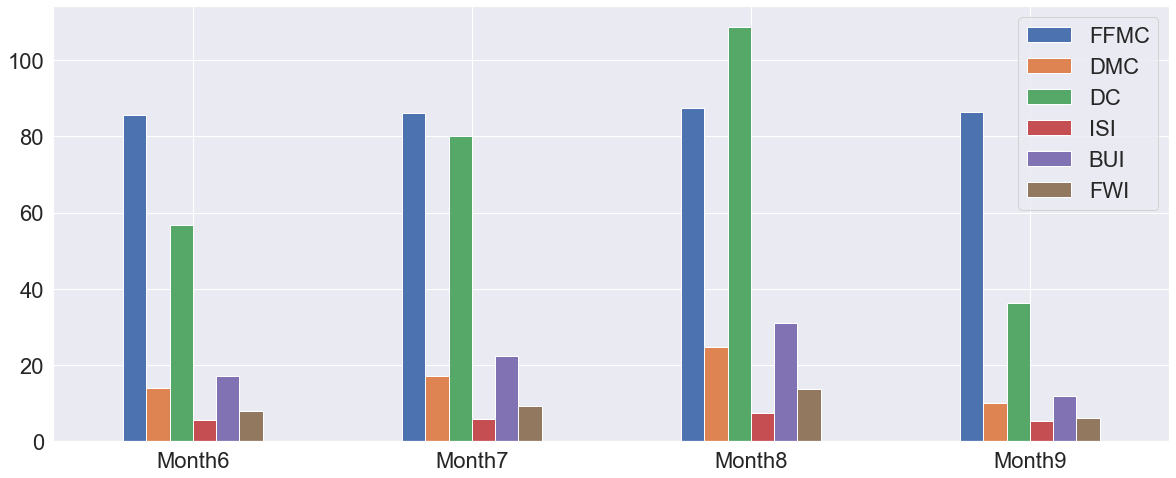

In [95]:
fire1=df.loc[df["Classes"]==1,["month","FFMC","DMC","DC","ISI","BUI","FWI"]]
month_6=np.mean(fire1.loc[fire1["month"]==6,["FFMC","DMC","DC","ISI","BUI","FWI"]])
month_7=np.mean(fire1.loc[fire1["month"]==7,["FFMC","DMC","DC","ISI","BUI","FWI"]])
month_8=np.mean(fire1.loc[fire1["month"]==8,["FFMC","DMC","DC","ISI","BUI","FWI"]])
month_9=np.mean(fire1.loc[fire1["month"]==9,["FFMC","DMC","DC","ISI","BUI","FWI"]])
l2=[month_6,month_7,month_8,month_9]
df23=pd.DataFrame(l2)
df23.index=["Month6","Month7","Month8","Month9"]
print(df23)
df23.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0)

Temperature is high in 8 month humudity is low comparativily all the parameter of FWI is high in this particular month 
Hence Fire is more in this month . 

# changing the Categorical Variable into Numerical 

In [94]:
df["Classes"]=df["Classes"].map({"Not Fire":0,"Fire":1})

In [95]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [56]:
#VIF variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']]
y=df[["Classes"]]
X = sm.add_constant(x)

In [78]:
reg = sm.OLS(y, X).fit()


In [58]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,Temperature,2.871359
1,RH,2.205181
2,Ws,1.350307
3,Rain,1.802509
4,FFMC,12.172331
5,DMC,704.953465
6,DC,186.492154
7,ISI,96.203774
8,BUI,1600.405741
9,FWI,158.539338


There are high  multicolliernity in the independent variable 

In [59]:
## Indipendent variable correlation 
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


<AxesSubplot:>

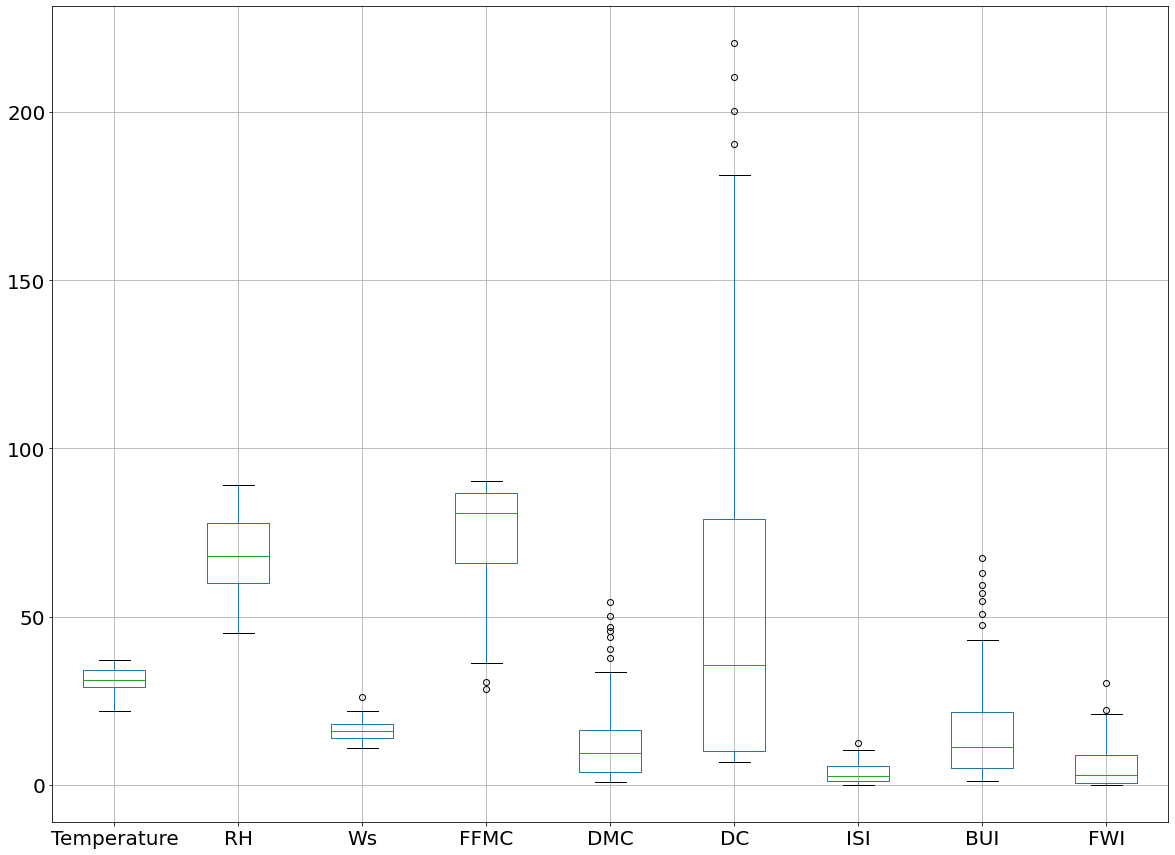

In [96]:
### Box plot to find the Outliers
df.boxplot(column=[ 'Temperature', 'RH', 'Ws','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI'],figsize=(20,15),fontsize=20)

In [97]:
## Creating the IQR function to avoid the repeting of code. 

def IQR(data):
    """This code is writen to check the outlier in all the columns of df dataset"""
    sorted(data)
    q1,q3=np.percentile((data),(25,75))
    q1=round (q1,3)
    q3=round(q3,3)
    iqr=q3-q1
    lower_fence=q1-(1.5*iqr)
    lower_fence=round(lower_fence,2)
    upper_fence=q3+(1.5*iqr)
    upper_fence=round(upper_fence,2)
    return (lower_fence,upper_fence)

In [141]:
## Checking the outlier in Temperature 
IQR(df["Temperature"])

(23.0, 39.0)

In [140]:
### DROPING  the OUTLIERS Data points 
df.drop(df["Temperature"][(df["Temperature"]<21.5)|(df["Temperature"]>41.5)].index,inplace=True)

In [142]:
## Checking the outlier in RH 
IQR(df["RH"])

(35.0, 103.0)

In [143]:
### Droping  the OUTLIERS Data points 
df.drop(df["RH"][(df["RH"]<35)|(df["RH"]>103)].index,inplace=True)

In [103]:
## Checking the outlier in RH 
IQR(df["Ws"])

(8.0, 24.0)

In [144]:
### Droping  the OUTLIERS Data points
df.drop(df["Ws"][(df["Ws"]<8)|(df["Ws"]>24)].index,inplace=True)

In [112]:
## Checking the outlier in FFMC
IQR(df["FFMC"])

(34.65, 118.05)

In [139]:
### Droping  the OUTLIERS Data points
df.drop(df["FFMC"][(df["FFMC"]<34.65) | (df["FFMC"]> 118.05)].index , inplace=True)

In [118]:
## Checking the outlier in DMC
IQR(df["DMC"])

(-15.14, 35.16)

In [137]:
### DROPTING  the OUTLIERS Data points 
df.drop(df["DMC"][(df["DMC"]<-15.14) | (df["DMC"]>35.16)].index , inplace=True)

In [151]:
## Checking the outlier in DMC
IQR(df["DC"])

(-75.61, 151.29)

In [153]:
### DROPTING  the OUTLIERS Data points 
df.drop(df["DC"][(df["DC"]<-79.6) | (df["DC"]>151.29)].index , inplace=True)

In [155]:
## Checking the outlier in ISI
IQR(df["ISI"])

(-5.65, 12.35)

In [156]:
### DROPTING  the OUTLIERS Data points 
df.drop(df["ISI"][(df["ISI"]<-5.65) | (df["ISI"]>12.35)].index , inplace=True)

In [158]:
## Checking the outlier in BUI
IQR(df["BUI"])

(-15.85, 38.15)

In [159]:
### DROPTING  the OUTLIERS Data points 
df.drop(df["BUI"][(df["BUI"]<-15.85) | (df["BUI"]>38.15)].index , inplace=True)

<AxesSubplot:>

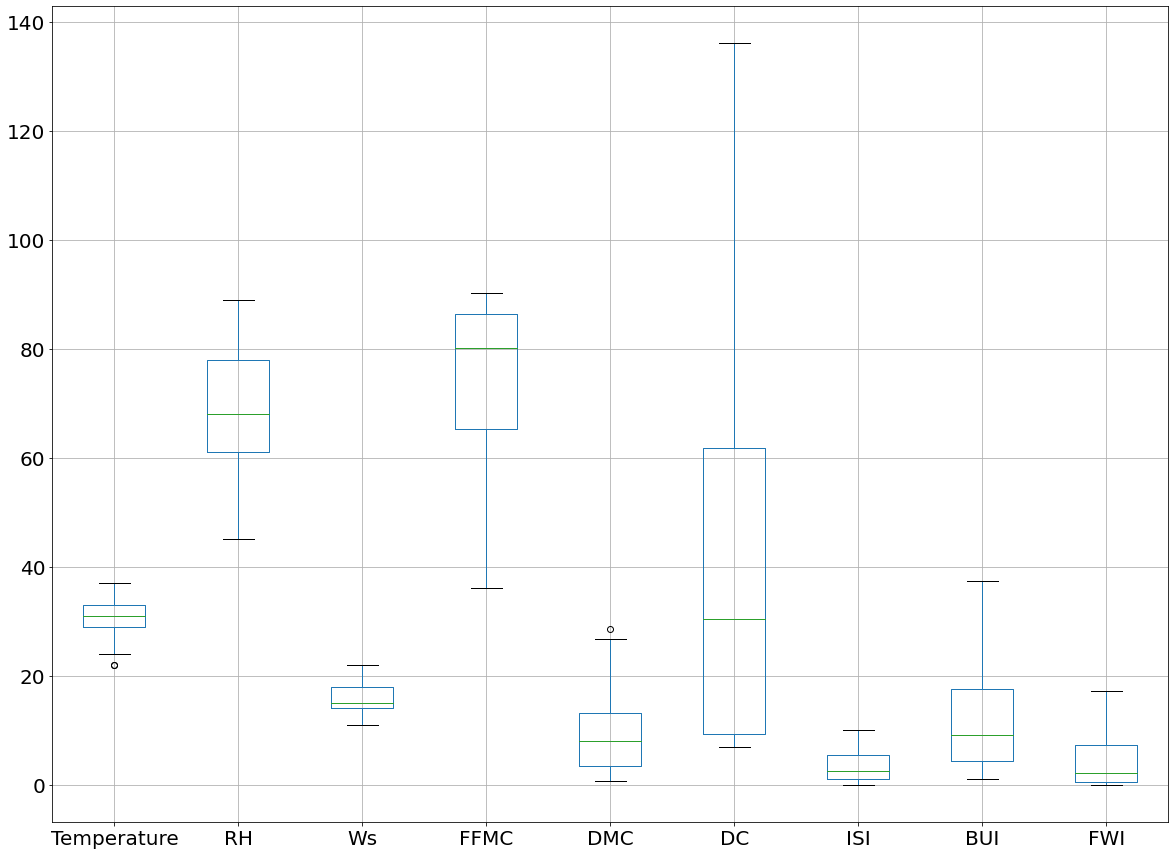

In [160]:
## RECHECKING THE DATA FOR OUTLIERS
df.boxplot(column=[ 'Temperature', 'RH', 'Ws','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI'],figsize=(20,15),fontsize=20)

In [189]:
X = df.iloc[:,3:13]
X.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4


In [190]:
Y=df.iloc[:,-1]
Y.head(2)

0    0.0
1    0.0
Name: Classes, dtype: float64

In [191]:
### Frist do train and test split 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (X,Y,test_size=0.33,random_state=42)

In [192]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
40,33,76,14.0,0.0,81.1,8.1,18.7,2.6,8.1,2.2
5,31,67,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5
53,28,78,16.0,0.1,70.0,9.6,79.7,1.4,14.7,1.3
63,35,63,14.0,0.3,76.6,5.7,10.0,1.7,5.5,0.8
39,33,69,13.0,0.7,66.6,6.0,9.3,1.1,5.8,0.5


In [193]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
79,35,62,19.0,0.0,89.4,23.2,120.9,9.7,31.3,17.2
10,31,65,14.0,0.0,84.5,12.5,54.3,4.0,15.8,5.6
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
95,29,73,17.0,0.1,68.4,1.9,15.7,1.4,2.9,0.5
65,34,65,13.0,0.0,86.8,11.1,29.7,5.2,11.5,6.1


In [194]:
y_test.head()

79    1.0
10    1.0
4     0.0
95    0.0
65    1.0
Name: Classes, dtype: float64

In [195]:
y_train.head()

40    0.0
5     1.0
53    0.0
63    0.0
39    0.0
Name: Classes, dtype: float64

In [233]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [234]:
predction_logestic=logisticRegr.predict(x_test)

In [235]:
score = logisticRegr.score(x_test, y_test)
print(score)

1.0


In [238]:
### confussion matrix for logestic 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predction_logestic)
print(cm)

[[21  0]
 [ 0 16]]


In [239]:
###Deision tree 

from sklearn.tree import DecisionTreeRegressor

treereg=DecisionTreeRegressor()
treereg.fit(x_train,y_train)


DecisionTreeRegressor()

In [217]:
predction_decsiontree=treereg.predict(x_test)

In [218]:
###proformance matrix of descion tree 
from sklearn.metrics import r2_score
r=r2_score(y_test,predction_decsiontree)
print (r)

0.7797619047619049


In [237]:
cm1 = metrics.confusion_matrix(y_test, predction_decsiontree)
print(cm)

[[21  0]
 [ 0 16]]


In [219]:
###RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rendomreg= RandomForestRegressor()
rendomreg.fit(x_train,y_train)

RandomForestRegressor()

In [220]:
predction_rendom=rendomreg.predict(x_test)

In [221]:
###proformance matrix of rendom forest  

r1=r2_score(y_test,predction_rendom)
print (r1)

0.7252970238095239


In [222]:
###SVM 
from sklearn.svm import SVC
reg_svc=SVC()
reg_svc.fit(x_train,y_train)


SVC()

In [223]:
predction_svc=reg_svc.predict(x_test)

In [240]:
## proformance matrix 
svc_proforance=r2_score(y_test,predction_svc)
print (svc_proforance)

0.6696428571428572


In [241]:
import pickle
pickle.dump(rendomreg,open('model1.pkl',"wb"))

In [242]:
pickle_model=pickle.load(open('model1.pkl',"rb"))
pickle_model.predict(x_test)

array([1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.98, 0.  , 0.97,
       1.  , 1.  , 0.98, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.77, 1.  , 1.  , 0.  ])

In [252]:
dict_test=dict(x_test.loc[0])

dict_test

{'Temperature': 29.0,
 'RH': 57.0,
 'Ws': 18.0,
 'Rain': 0.0,
 'FFMC': 65.7,
 'DMC': 3.4,
 'DC': 7.6,
 'ISI': 1.3,
 'BUI': 3.4,
 'FWI': 0.5}

In [253]:
dict_test.values()

dict_values([29.0, 57.0, 18.0, 0.0, 65.7, 3.4, 7.6, 1.3, 3.4, 0.5])

In [254]:
list(dict_test.values())

[29.0, 57.0, 18.0, 0.0, 65.7, 3.4, 7.6, 1.3, 3.4, 0.5]

In [255]:
pickle_model.predict([[29.0, 57.0, 18.0, 0.0, 65.7, 3.4, 7.6, 1.3, 3.4, 0.5]])[0]

C:\Users\prash\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.0

In [251]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13.0,2.5,80.9,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
5,6,6,2012,31,67,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1.0
6,7,6,2012,33,54,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1.0
7,8,6,2012,30,73,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1.0
8,9,6,2012,25,88,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0.0
9,10,6,2012,28,79,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0
